In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("../Data/raw_analyst_ratings/raw_analyst_ratings.csv", )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [3]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Descriptive statistics

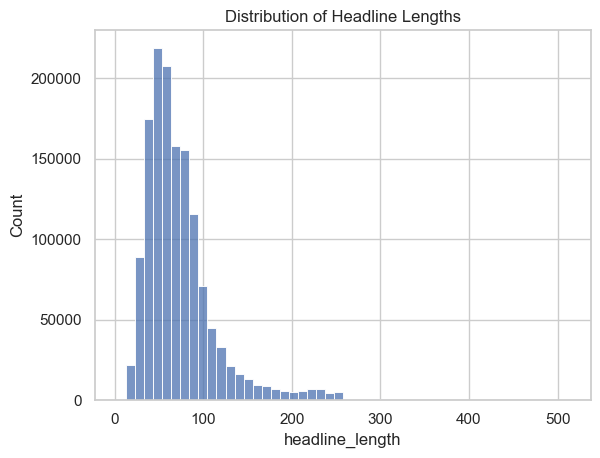

In [4]:
df['headline_length'] = df['headline'].apply(len)
sns.histplot(df['headline_length'], bins=50)
plt.title('Distribution of Headline Lengths')
plt.show()

In [5]:
df.count()
publisher_count = df["publisher"].value_counts()

#top publishers
top_publishers = publisher_count.head(10)
print(top_publishers)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


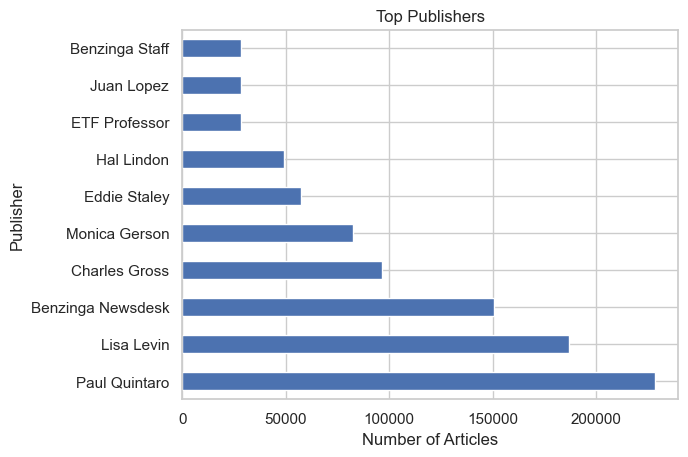

In [6]:
top_publishers.plot(kind='barh', title='Top Publishers')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

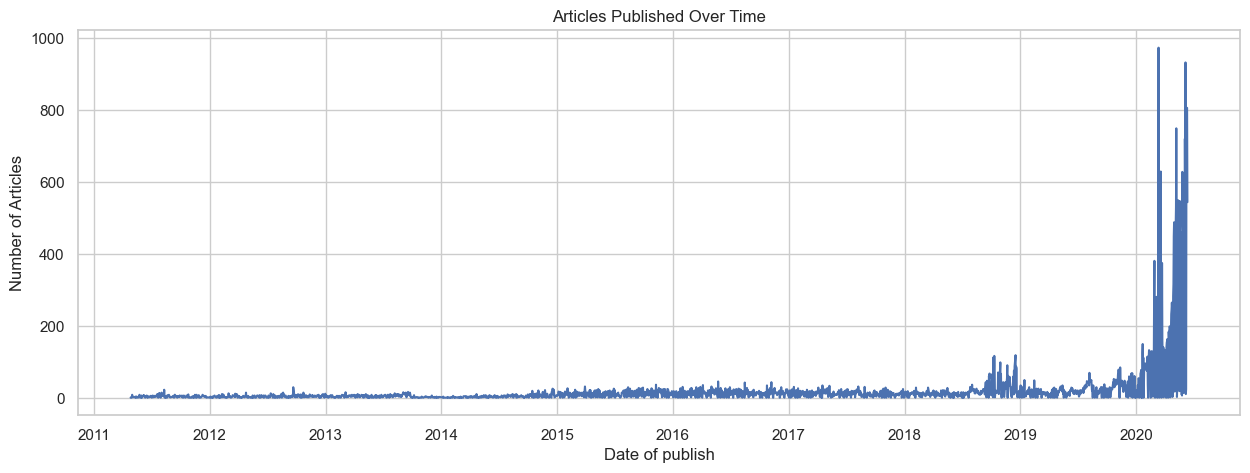

In [7]:
# Articles over time
# Convert to datetime, coercing errors to NaT (Not a Time)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Remove timezone information from all dates
df['date'] = df['date'].dt.tz_localize(None)

# Now the rest of your code will work
df['date_only'] = df['date'].dt.date
articles_per_day = df.groupby('date_only').size()

articles_per_day.plot(figsize=(15, 5), title='Articles Published Over Time')
plt.ylabel('Number of Articles')
plt.xlabel("Date of publish")
plt.show()



The graph shows that the number of articles about stock markets showed a massive spike in 2020, likely due to the COVID-19 pandemic and its impact on global economies. The number of articles has since stabilized but remains higher than pre-2020 levels.

In [3]:
import nltk
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from collections import Counter
MIN_WORD_LENGTH = 3

In [24]:
nltk_data_path = os.path.join(os.environ["USERPROFILE"], "AppData", "Roaming", "nltk_data")
nltk.data.path.append(nltk_data_path)

# Now download resources
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dagiM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dagiM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
punkt_path = r"C:\Users\dagiM\AppData\Roaming\nltk_data\tokenizers\punkt"
print("Exists:", os.path.exists(punkt_path))
print("Files:", os.listdir(punkt_path) if os.path.exists(punkt_path) else "Not Found")


Exists: True
Files: ['.DS_Store', 'czech.pickle', 'danish.pickle', 'dutch.pickle', 'english.pickle', 'estonian.pickle', 'finnish.pickle', 'french.pickle', 'german.pickle', 'greek.pickle', 'italian.pickle', 'malayalam.pickle', 'norwegian.pickle', 'polish.pickle', 'portuguese.pickle', 'PY3', 'README', 'russian.pickle', 'slovene.pickle', 'spanish.pickle', 'swedish.pickle', 'turkish.pickle']


In [4]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)
    return ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words])

df['clean_headline'] = df['headline'].apply(preprocess_text)

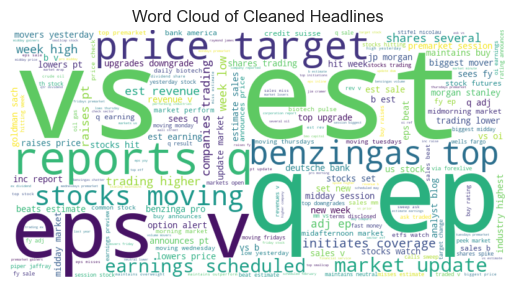

In [5]:
text = ' '.join(df['clean_headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Headlines')
plt.show()

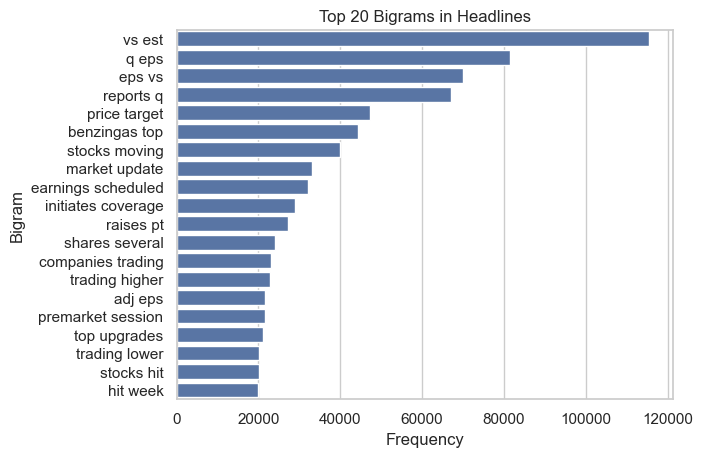

In [6]:

from collections import Counter

def generate_bigrams(text):
    words = text.split()
    return [' '.join(pair) for pair in zip(words, words[1:])]

bigrams = []
df['clean_headline'].apply(lambda x: bigrams.extend(generate_bigrams(x)))
bigram_counts = Counter(bigrams).most_common(20)

df_ngrams = pd.DataFrame(bigram_counts, columns=['Bigram', 'Frequency'])
sns.barplot(data=df_ngrams, x='Frequency', y='Bigram')
plt.title('Top 20 Bigrams in Headlines')
plt.show()

In [29]:
df['publication_day'] = df['date'].dt.date
df['publication_hour'] = df['date'].dt.hour
df['publication_weekday'] = df['date'].dt.day_name()
df['publication_month_year'] = df['date'].dt.to_period('M')



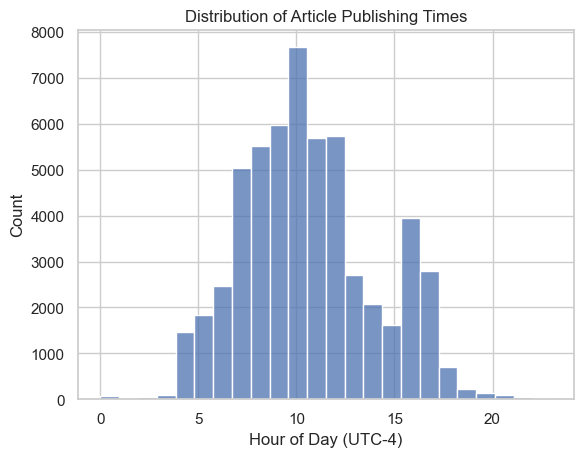

In [30]:
sns.histplot(df['publication_hour'], bins=24)
plt.title('Distribution of Article Publishing Times')
plt.xlabel('Hour of Day (UTC-4)')
plt.show()

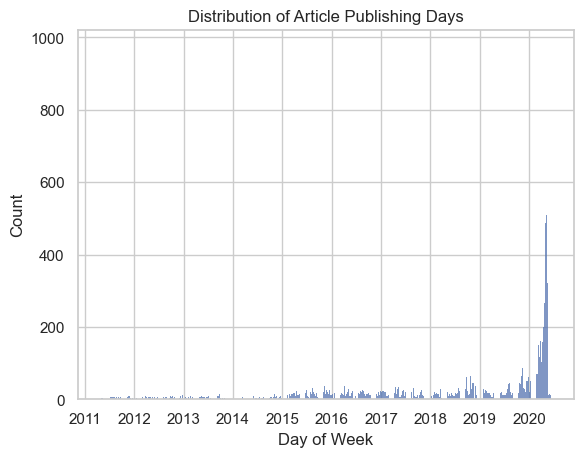

In [32]:
sns.histplot(df['publication_day'], bins=24)
plt.title('Distribution of Article Publishing Days')
plt.xlabel('Day of Week')
plt.show()

C:\Users\dagiM\AppData\Local\Temp\ipykernel_13908\185047941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=articles_by_weekday.index, y=articles_by_weekday.values, palette='magma')


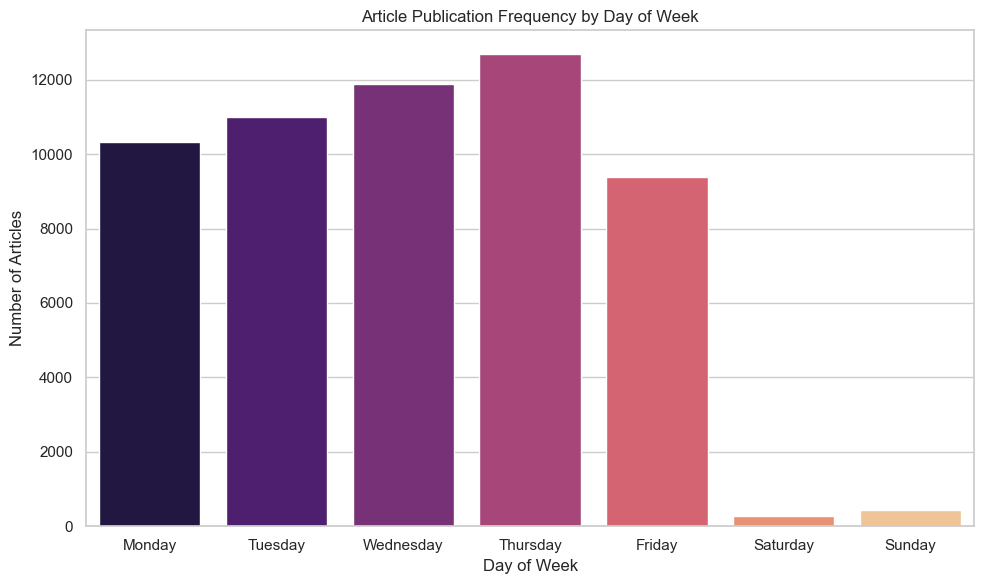

In [34]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
articles_by_weekday = df['publication_weekday'].value_counts().reindex(weekday_order)
plt.figure(figsize=(10, 6))
sns.barplot(x=articles_by_weekday.index, y=articles_by_weekday.values, palette='magma')
plt.title('Article Publication Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.tight_layout()

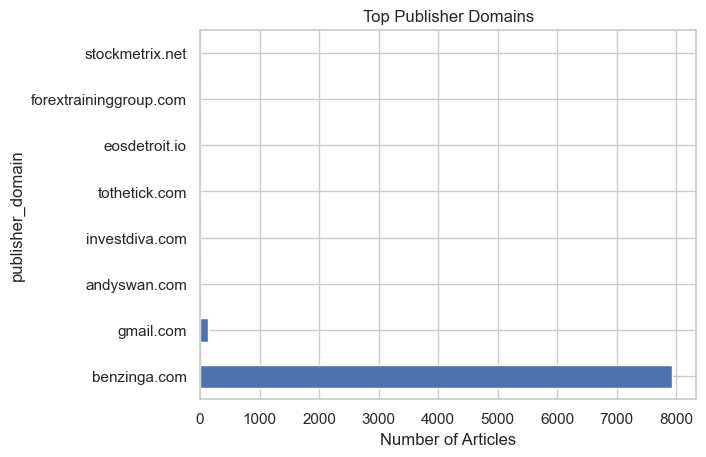

In [35]:
df['publisher_domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')
top_domains = df['publisher_domain'].value_counts().head(10)
top_domains.plot(kind='barh', title='Top Publisher Domains')
plt.xlabel('Number of Articles')
plt.show()